<hr>

##### Mount Drive - **Google Colab Only Step**

When using google colab in order to access files on our google drive we need to mount the drive by running the below python cell, then clicking the link it generates and pasting the code in the cell.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Change Directory To Access The Dependent Files - **Google Colab Only Step**

In [2]:
directory = "studsent"
if (directory == "student"):
  %cd drive/Colab\ Notebooks/data-science-track/
else:
  %cd drive/Shared\ drives/Rubrik/Data\ Science/Course/Data-Science-Track

/content/drive/Shared drives/Rubrik/Data Science/Course/Data-Science-Track


# Midterm Project

Overall goal of this is to create a useful dataset so that we can create a machine learning model to be able to predict the `tx_price` variable based on unique features. 

<br>

It is important to note that having more features (columns/series) and unique values for each feature doesn't mean a better machine learning algorithm. Infact it will increase the noise and decrease the efficiency and can result in overfitting.

<br>

A **target variable** is the variable whose values are to be modeled and predicted by other variables (features). Those variables (features), called “predictor variables” are variables whose values will be used to predict the value of the target variable.

<br>

## Given the real estate data answer the following questions:


**Is their a correlation between property tax and transaction price (tx_price)?**

Their is a high correlation between property taxes and transaction prices.  This is made clear by inspecting the heatmap below. The data and heatmap make sense as a homes property taxes are based on the price of the home.

<br>

**Does lifestyle features effect tx_price?**

No.

<hr>

# Data Schema
- **tx_price:** The sell price of the home
- **LotArea:** Lot size in square feet
- **Neighborhood:** Physical locations within Ames city limits
- **BldgType:** Type of dwelling
       **1Fam:**	Single-family Detached	
       **2FmCon:**	Two-family Conversion; originally built as one-family dwelling
       **Duplx:**	Duplex
       **TwnhsE:**	Townhouse End Unit
       **TwnhsI:**	Townhouse Inside Unit
- **YearBuilt:** Original construction date
- **YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions)
- **MasVnrArea:** Masonry veneer area in square feet
- **TotalBsmtSF:** Total square feet of basement area
- **CentralAir:** Central air conditioning
- **1stFlrSF:** irst Floor square feet
- **2ndFlrSF:** Second floor square feet
- **GrLivArea:** Above grade (ground) living area square feet
- **BsmtFullBath:** Basement full bathrooms
- **BsmtHalfBath:** Basement half bathrooms
- **FullBath:** Full bathrooms above grade
- **HalfBath:** Half baths above grade
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **KitchenAbvGr:** Kitchens above grade
- **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
- **Fireplaces:** Number of fireplaces
- **GarageType:** Garage location
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
- **GarageYrBlt:** Year garage was built
- **GarageCars:** Size of garage in car capacity
- **GarageArea:** Size of garage in square feet
- **MoSold:** Month Sold (MM)
- **YrSold:** Year Sold (YYYY)
- **SalePrice:** Dollar amount unit sold for
- **Siding:** Exterior covering on house

The outline to follow has been included down below. Each topic has the steps included with a blank cell, feel free to create as many new cells to keep your code separated.

Extra challenge:  If you want to make a categorical prediction, create a new column and bin the SalePrice into three categories (small, medium and large) then remove the SalePrice and try to predict that new column.

<hr>

# Setup

### Import Libraries

*   Numpy
*   pandas
*   matplotlib
*   seaborn



##### Import numpy

In [0]:
import numpy as np

##### Import pandas

In [0]:
 import pandas as pd

##### Import matplotlib

In [0]:
import matplotlib.pyplot as plt

##### Import seaborn

In [0]:
import seaborn as sns

#### Library Configurations
Specifically use seaborn graphs rather than matplotlib's graphs
and also showcase all of the DataFrame's columns and rows
```python
sns.set() # make seaborn override the styling of matplotlib graphs
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows
```

In [0]:
sns.set() # make seaborn override the styling of matplotlib graphs
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows

<hr>

### Import Data
Read in the real estate dataset using the following path and store it in a variable called `df`.

## Import the cleaned real estate dataset
- Use pandas' `read_csv()` function

#### Pandas' `read_csv()` parameters:
- `filepath_or_buffer` (string): path of csv to import

```python 
filepath_or_buffer = './data/dirty-midterm-real-estate-data.csv'
```

In [0]:
path='./data/dirty-midterm-real-estate-data.csv'
df = pd.read_csv(filepath_or_buffer=path)

<hr>

# Exploratory Data Analysis - EDA
It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand, before getting them dirty with it.

### Display Head 

In [9]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,dates
0,295850.0,1.0,1.0,584.0,2013.0,0.0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107.0,9.0,30.0,19.0,89.0,6.0,47.0,58.0,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013.0,0
1,216500.0,1.0,1.0,612.0,1965.0,0.0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105.0,15.0,6.0,13.0,87.0,2.0,26.0,14.0,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,279900.0,1.0,1.0,615.0,1963.0,0.0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183.0,13.0,31.0,30.0,101.0,10.0,74.0,62.0,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012.0,3
4,379900.0,1.0,1.0,618.0,2000.0,33541.0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198.0,9.0,38.0,25.0,127.0,11.0,72.0,83.0,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005.0,4


### Display Tail

In [10]:
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,dates
2106,378672.0,3.0,2.0,2591.0,2007.0,0.0,Apartment / Condo / Townhouse,NaN,Composition Shingle,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,34.0,67.0,61.0,320.0,82.0,8.5,2.0,2007.0,683
2107,474000.0,4.0,3.0,2375.0,1965.0,12196.0,Single-Family,Brick,Composition Shingle,1.0,14.0,3.0,1.0,3.0,14.0,3.0,6.0,11.0,46.0,78.0,77.0,531.0,162.0,7.0,3.0,2004.0,1278
2108,327570.0,4.0,3.0,2722.0,1997.0,3441.0,Single-Family,Combination,NaN,NaN,43.0,9.0,3.0,10.0,58.0,7.0,28.0,24.0,34.0,71.0,70.0,596.0,207.0,7.0,3.0,1997.0,2037
2109,462790.0,3.0,2.0,3040.0,2004.0,3484.0,Apartment / Condo / Townhouse,NaN,Composition Shingle,1.0,24.0,1.0,5.0,0.0,12.0,1.0,8.0,13.0,40.0,80.0,66.0,436.0,112.0,8.0,3.0,2004.0,698
2110,450000.0,3.0,2.0,1590.0,1986.0,11325.0,Single-Family,NaN,Asphalt,1.0,47.0,3.0,3.0,4.0,51.0,2.0,32.0,13.0,38.0,78.0,51.0,397.0,102.0,6.0,3.0,2006.0,537


### Display the dimensions of the dataset

This will become important for us later once we manipulate the DataFrame.
We will use the shape dimensions to make sure we are manipulating the DataFrame correctly.

i.e.
  - deleting rows and columns
  - adding columns


#### Use the `.shape` property of the DataFrame to find out the shape of the dataset
This will be useful when we manipulate the DataFrame later and we want to confirm that we performed the operation correctly.

In [11]:
# Dataframe dimensions
df.shape

(2111, 27)

### Display the data types of our features
- Use the DataFrame's `info()` method to find out more about the DataFrame, such as the column data types and column names 

In [12]:
# Column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 27 columns):
tx_price              2105 non-null float64
beds                  2105 non-null float64
baths                 2105 non-null float64
sqft                  2105 non-null float64
year_built            2105 non-null float64
lot_size              2105 non-null float64
property_type         2105 non-null object
exterior_walls        1850 non-null object
roof                  1702 non-null object
basement              1852 non-null float64
restaurants           2105 non-null float64
groceries             2105 non-null float64
nightlife             2105 non-null float64
cafes                 2105 non-null float64
shopping              2105 non-null float64
arts_entertainment    2105 non-null float64
beauty_spas           2105 non-null float64
active_life           2105 non-null float64
median_age            2105 non-null float64
married               2105 non-null float64
college_grad    

#### Question: 
What columns are text, or classified as categorical data? 

- property_type
- exterior_walls
- roof

### Remove the features that will not provide any information to the model

#### Unused variables
Unused variables are neither inputs nor targets. We can set a variable to Unused when it does not provide any information to the model (id number, address...).

Constant variables are those columns in the data matrix having always the same value. They should be set as Unused, since do not provide any information to the model but increase its complexity.

<br>

In our case this dataset has a `date` feature (series/column) that was added to show us that this feature was junk and will not contribute to providing information to the model. 

#### Remove the `date` feature from the DataFrame
**tip:** you can drop rows by reassigning the dataframe with a different index of columns or use the DataFrame's drop method

##### DataFrame's `drop()` parameters:
- `labels` (string or list of strings): index or column labels to drop
- `axis`  ({0 or ‘index’, 1 or ‘columns’}): default 0; whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
- `inplace` (bool): default False; If True, do operation inplace and return None.

In [0]:
df = df.drop(labels='dates', axis=1)

#### Confirm that we have dropped the row correctly by checking the shape

In [14]:
df.shape

(2111, 26)

<hr> 

<br>

# Distributions Of Numeric Features
- Use the DataFrame's `hist` method to create a histogram for each numerical features 

#### Arguments to consider passing in:
- (optional) `bins:` splits the data into groups based on the number specified 
- (optional) `xrot:` rotates x-axis labels counter-clockwise; <span style="color:red"> really useful for long x index labels </span>
- (optional) `figsize`: (float, float) width, height in inches.
- (optional) `color:` colors the histogram with one of these values {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}

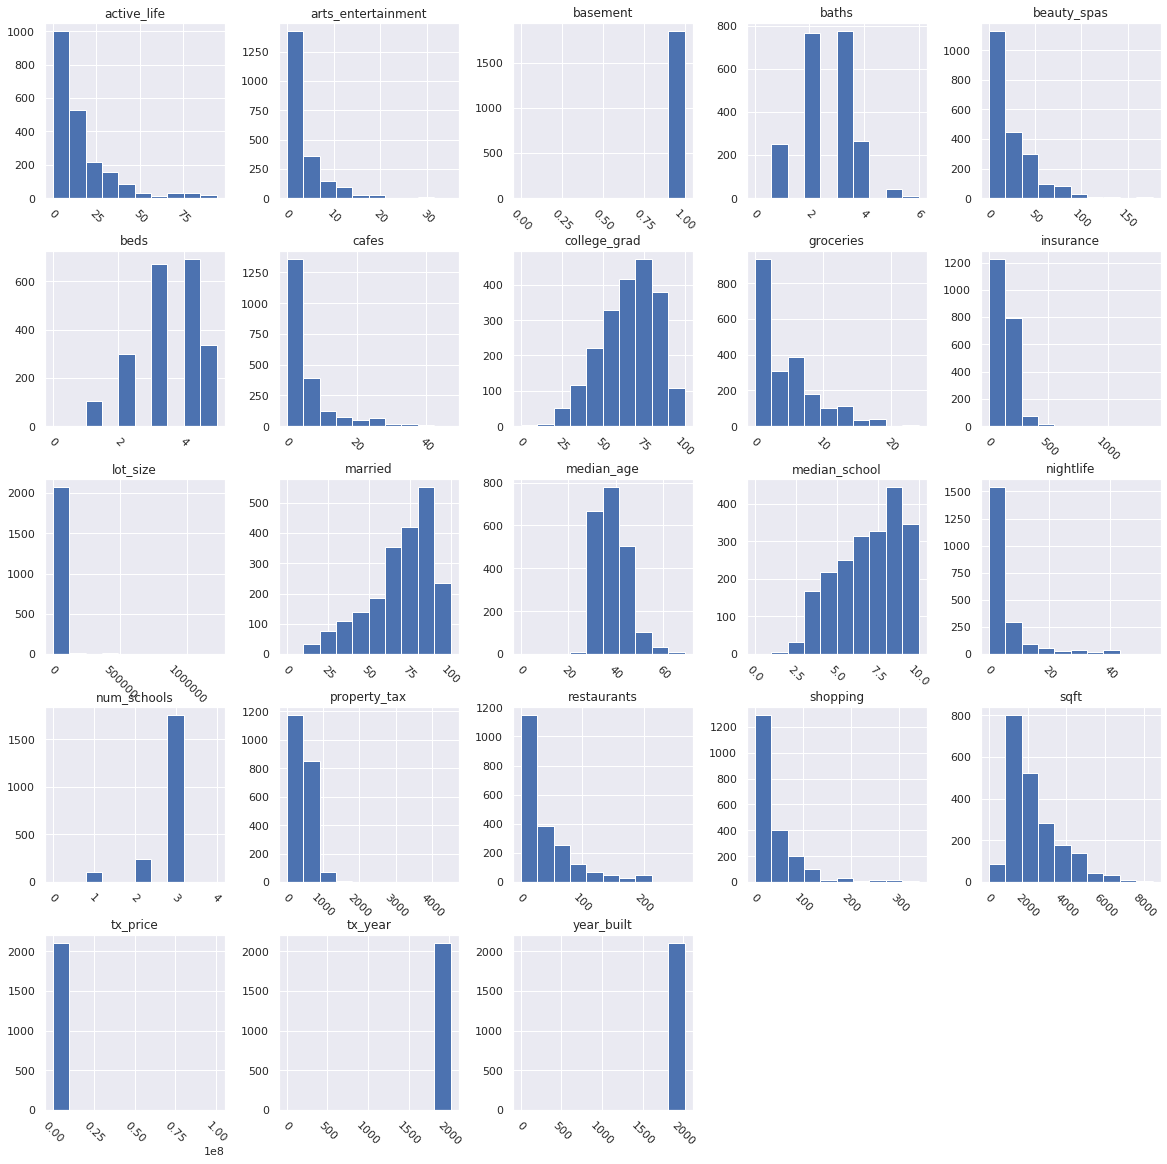

In [15]:
df.hist(xrot=-45, figsize=(20, 20))
plt.show()

## Fix Numerical Structural Errors

The next bucket under data cleaning involves fixing structural errors.

Here is a list of some structural errors:
- duplicate rows
- unwanted values in columns **i.e.** blank values
- outliers in columns
- features (columns) can suffer from sparse classes, meaning features that have a lot of different uniuqe values
- mislabeled classes ( mislabeled values)

<br id="drop">

### Drop unwanted observations

#### Drop all duplicate observations using the DataFrame's `drop_duplicates()` method

##### `drop_duplicates()` parameters: 
- `subset` (string): Subset takes a column or list of column label. It’s default value is none. After passing columns, it will consider them only for duplicates.
-`keep` (string): keep is to control how to consider duplicate value. It has only three distinct value and default is ‘first’.
  - If ‘first’, it considers first value as unique and rest of the same values as duplicate.
  - If ‘last’, it considers last value as unique and rest of the same values as duplicate.
  - If `False`, it consider all of the same values as duplicates
- `inplace` (boolean): default False, Whether to drop duplicates in place or to return a copy

**Return type**: DataFrame with removed duplicate rows depending on Arguments passed. i.e. if inplace == True then nothing will be returned 

#### Generic Example: 
```python 
 df = df.drop_duplicates()

 # inplace example
  df.drop_duplicates(inplace=True)
```


### Check the shape of the real estate DataFrame before removing the duplicates

In [16]:
# Print shape of dataframe
print(df.shape)

(2111, 26)


### Delete duplicates with the inplace argument set as true


In [0]:
# Drop any duplicates
df.drop_duplicates(inplace=True)

### Check the shape of the real estate DataFrame to see if any changes were made

In [18]:
# Print shape of new dataframe to compare
print(df.shape)

(1886, 26)


#### How many rows were duplicates?
20 

<br id="structural">

### Let us look at which columns have blank values

Hint: 
- Use the DataFrame's `isnull()` method
- Chain the `sum()` method on the return of the `isnull()` method to tally up the number of null values in each column


In [19]:
df.isnull().sum()

tx_price                1
beds                    1
baths                   1
sqft                    1
year_built              1
lot_size                1
property_type           1
exterior_walls        224
roof                  356
basement              228
restaurants             1
groceries               1
nightlife               1
cafes                   1
shopping                1
arts_entertainment      1
beauty_spas             1
active_life             1
median_age              1
married                 1
college_grad            1
property_tax            1
insurance               1
median_school           1
num_schools             1
tx_year                 1
dtype: int64

### Drop rows with more than twenty columns with null values 

`dropna` parameters: 
- `thresh` (int): number of columns required to have null values in order for the row to be dropped
- `inplace` (boolean): default False, Whether to drop duplicates in place or to return a copy


In [0]:
df.dropna(thresh=20, inplace=True)

### Let us look at the number of blank values each columns have to see if we did in fact delete the rows with more than twenty null values

Hint: 
- Use the DataFrame's `isnull()` method
- Chain the `sum()` method on the return of the `isnull()` method to tally up the number of null values in each column

In [21]:
df.isnull().sum()

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
property_type           0
exterior_walls        223
roof                  355
basement              227
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64

### Let us remove blank values from the 'basement' column

#### Let's see the different unique values of the `basement` column
- Use the series' `.unique()` method to display the unique values of the 'basement` column

In [22]:
# Display unique values of 'basement'
df['basement'].unique()

array([nan,  1.,  0.])

#### Fill missing <code style="color:steelblue">'basement'</code> values with the value <code style="color:crimson">0</code> to turn <code style="color:steelblue">'basement'</code> into a true `indicator` variable.

We will do this by using the series' `fillna()` method.
#### `fillna()` parameters:
- value (scalar, dict, Series, or DataFrame): The value to use to fill holes (e.g. 0)
-inplace (boolean): default False, if `True`, fill in-place


#### Fill in missing 'basement' values with 0

In [0]:
# Missing basement values should be 0
df['basement'] = df['basement'].fillna(0)

#### Confirm that we have a true indicator variable for the `basement` series (column):

In [24]:
# Display unique values of 'basement'
df.basement.unique()

array([0., 1.])

<hr>
<br id="outliers">

## Remove unwanted outliers

### Outliers recap

An **outlier** is a data point that differs significantly from other observations in a dataset. An outlier may be due to variability in a measurement or it may indicate that there was an experimental error. An outlier can cause serious problems if not evaluated and addressed.
Outliers can cause problems with certain types of models.

<br>

### Analyze the box and violin plot of your target variable, `tx_price`, since that's the variable that you're actually trying to predict. 

#### Use the seaborn's boxplot and violinplot functions to show distribution of the `tx_price` column. 

#### To show multiple plots on a single figure alter the following generic code:

```python 
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
 
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 5))

# Style Seaborn figure To Have White Background
sns.set_style('whitegrid') 

# Plot graphs on axes
left_plot = sns.countplot(x='feature_name', data=df, ax=ax[0])
right_plot = sns.violinplot(x='feature_name', data=df, ax=ax[1])

# setup labels for left graph
ax[0].set_title("Title Of Graph")
ax[0].set_xlabel('x_label')
ax[0].set_ylabel('y_label')

# setup labels for right graph
ax[1].set_title("Title Of Graph")
ax[1].set_xlabel('x_label')
ax[1].set_ylabel('y_label')

# Add space between plots
fig.tight_layout() 
```

#### sns.boxplot() and sns.violin() parameters:
- `x` (string): axis parameter provide the numerical column (series) name
- `y` (optional) (string): axis parameter provide the categorical column (series) name
- `data` (DataFrame): Dataset for plotting
- `ax`  ( optional) (matplotlib Axes): Axes object to draw the plot onto, otherwise uses the current Axes.

<br>

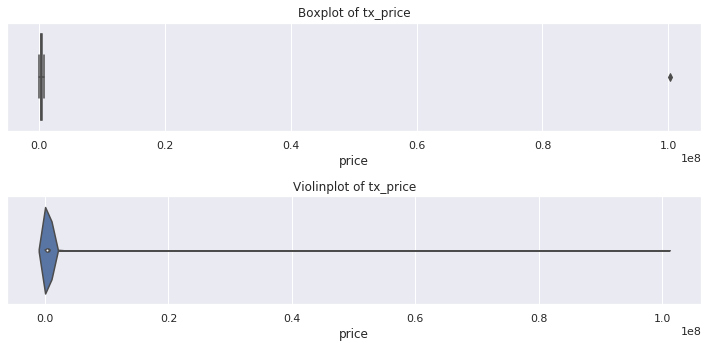

In [25]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
 
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Style Seaborn figure To Have White Background
sns.set_style('whitegrid') 

# plot graphs on axes
left_plot = sns.boxplot(x='tx_price', data=df, ax=ax[0])
right_plot = sns.violinplot(x='tx_price', data=df, ax=ax[1])

# setup labels for left graph
ax[0].set_title("Boxplot of tx_price")
ax[0].set_xlabel('price')

# setup labels for right graph
ax[1].set_title("Violinplot of tx_price")
ax[1].set_xlabel('price')

# add space between plots
fig.tight_layout() 

#### Does the graph look skewed, why would this be?

Yes, because there is an outlier altering the shape of the data and distribution.



**Sort tx_price series and display the top 5 samples.**
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> method.

#### Series' `sort_values()` parameters:
- `ascending` (boolean): By default, it's True which sort the values from low to high. Passing in False will sort the values from high to low.

**Tip:** You can chain functions together. For example print the head of the return value of `.sort_values()`

In [26]:
# Sort df['tx_price'] and display the top 5 samples
df['tx_price'].sort_values(ascending=False).head()

1305    100216250.0
1861       800000.0
1127       800000.0
859        800000.0
1720       800000.0
Name: tx_price, dtype: float64

#### **Remove observations with <code style="color:steelblue">tx_price</code> greater than 800,000 dollars**

#### Print the shape of the data before you manipulate it 


In [27]:
# print length of df
df.shape

(1885, 26)

#### Remove observations with `tx_price` greater than 800,000 dollars
- use a boolean mask (series) to filter the observations that match the condition of only selecting properties with sqft being greater that 800,000  (filter to keep only wanted observations)
* Overwrite the existing <code style="color:steelblue">df</code> object


In [0]:
# Remove tx_price outliers
df = df[df['tx_price'] <= 800000]

#### Print the shape to see if the manipulation took place

In [29]:
# print length of df
df.shape

(1884, 26)

#### Use the seaborn's boxplot and violinplot functions to show distribution of the `tx_price` column again to see the changes in distribution


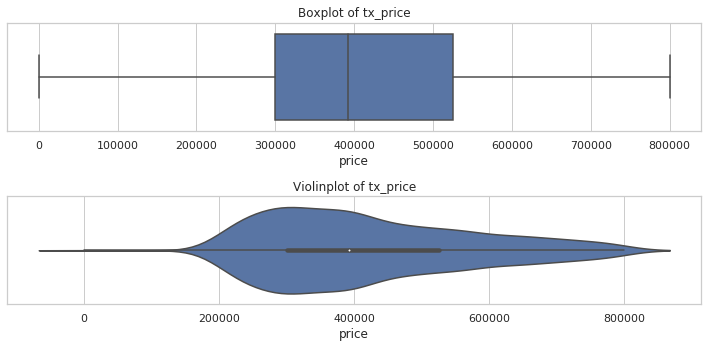

In [30]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
 
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Style Seaborn figure To Have White Background
sns.set_style('whitegrid') 

# plot graphs on axes
left_plot = sns.boxplot(x='tx_price', data=df, ax=ax[0])
right_plot = sns.violinplot(x='tx_price', data=df, ax=ax[1])

# setup labels for left graph
ax[0].set_title("Boxplot of tx_price")
ax[0].set_xlabel('price')

# setup labels for right graph
ax[1].set_title("Violinplot of tx_price")
ax[1].set_xlabel('price')

# add space between plots
fig.tight_layout() 

#### What's the difference between box plots and violin plots?

A Violin Plot is similar to a boxplot except we see the distributions in a different representation as well as the IQR and Median markers.

#### Describe the difference in distribution. What type of distribution does the plot look like?

It looks less skewed and more of a normal distribution

<br>

### Analyze other feature distributions
#### Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code> on a single figure

##### Feel free to reference the code above 

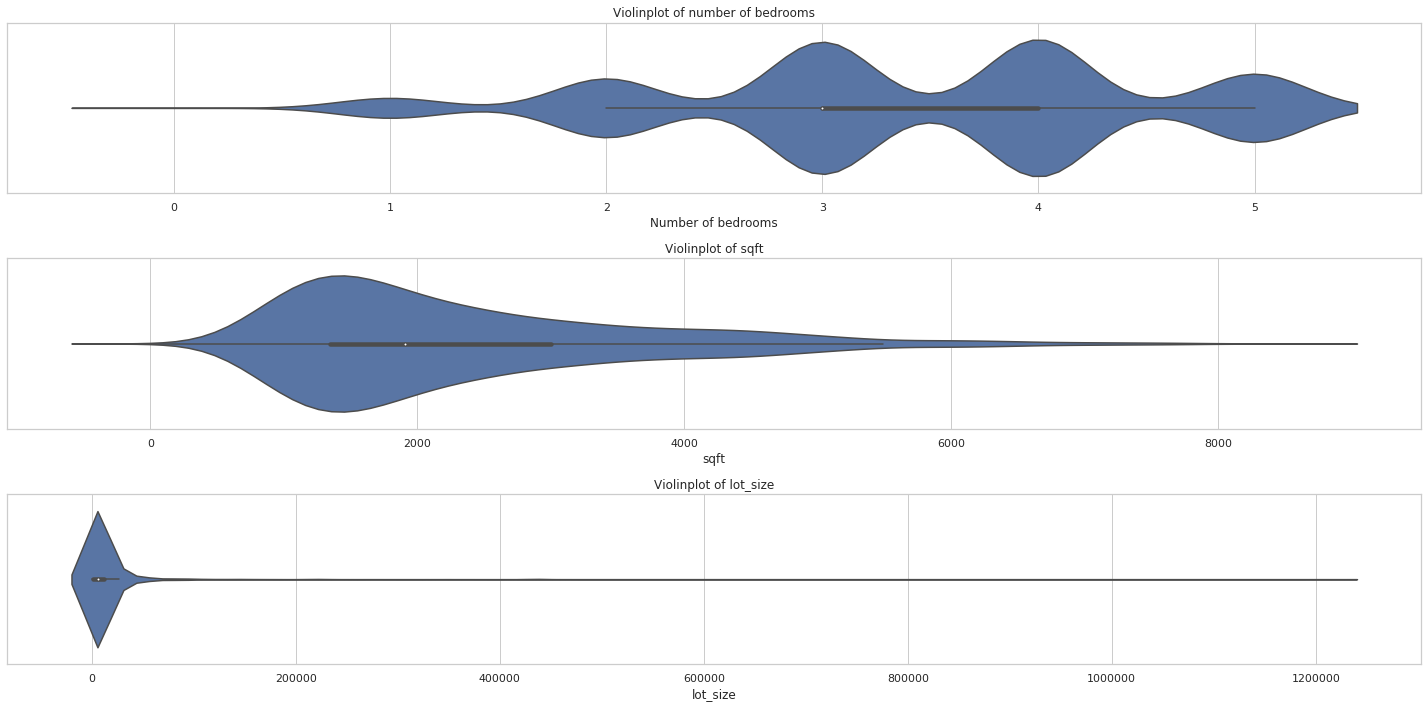

In [31]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
 
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))

# Style Seaborn figure To Have White Background
sns.set_style('whitegrid') 

# plot graphs on axes
top_plot = sns.violinplot(x='beds', data=df, ax=ax[0])
middle_plot = sns.violinplot(x='sqft', data=df, ax=ax[1])
bottom_plot = sns.violinplot(x='lot_size', data=df, ax=ax[2])

# setup labels for top graph
ax[0].set_title("Violinplot of number of bedrooms")
ax[0].set_xlabel('Number of bedrooms')

# setup labels for  graph
ax[1].set_title("Violinplot of sqft")
ax[1].set_xlabel('sqft')

# setup labels for right graph
ax[2].set_title("Violinplot of lot_size")
ax[2].set_xlabel('lot_size')

# add space between plots
fig.tight_layout() 

#### Among those three features, which one looks like it has a outlier? Why do you say this?

It looks like <code style="color:steelblue">lot_size</code> has a potential outlier! 
* Look at its long and skinny tail.



<br>

#### Let's look at the largest 5 lot sizes just to confirm that we have an outlier
**Sort <code style="color:steelblue">df['lot_size']</code> and display the top 5 samples.**
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> function.

#### DataFrames `sort_values()` parameters:
- `ascending` (boolean): By default, it's True which sort the values from low to high. Passing in False will sort the values from high to low.

**Tip:** You can chain functions together. For example print the head of the return value of `.sort_values()`

In [32]:
# Sort df.lot_size and display the top 5 samples
df['lot_size'].sort_values(ascending=False).head()

105     1220551.0
1116     436471.0
1839     436035.0
1883     436035.0
1576     435600.0
Name: lot_size, dtype: float64

#### **Remove observations with `lot_size` greater than 500,000 sqft**

#### Print the shape of the data before you manipulate it 


In [33]:
# print length of df
df.shape

(1884, 26)

#### Remove observations with `lot_size` greater than 500,000 dollars
- use a boolean mask (series) to filter the observations that match the condition of only selecting properties with sqft being greater that 800,000  (filter to keep only wanted observations)
* Overwrite the existing ```df``` object


In [0]:
# Remove lot_size outliers
df = df[df['lot_size'] < 500000]

#### Print the shape to see if the manipulation took place

In [35]:
# print length of df
df.shape

(1883, 26)

### Show the distribution for the lot_size Column again to see the difference in distribution

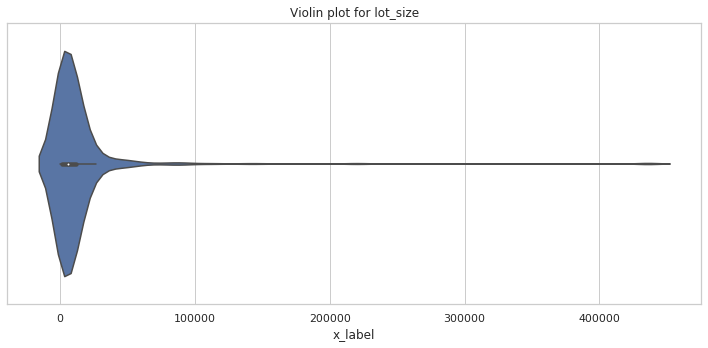

In [36]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
 
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# Style Seaborn figure To Have White Background
sns.set_style('whitegrid') 

# plot graphs on axes
plot = sns.violinplot(x='lot_size', data=df)

# setup labels for left graph
ax.set_title("Violin plot for lot_size")
ax.set_xlabel('x_label')



# add space between plots
fig.tight_layout() 

#### Show Histogram Of Numerical Data Again 
There is still an outlier so data will look odd, go down to the end of categorical distributions where we remove the row with all 0 values and re print this and you will see the distributions will look better. i.e. tx_year



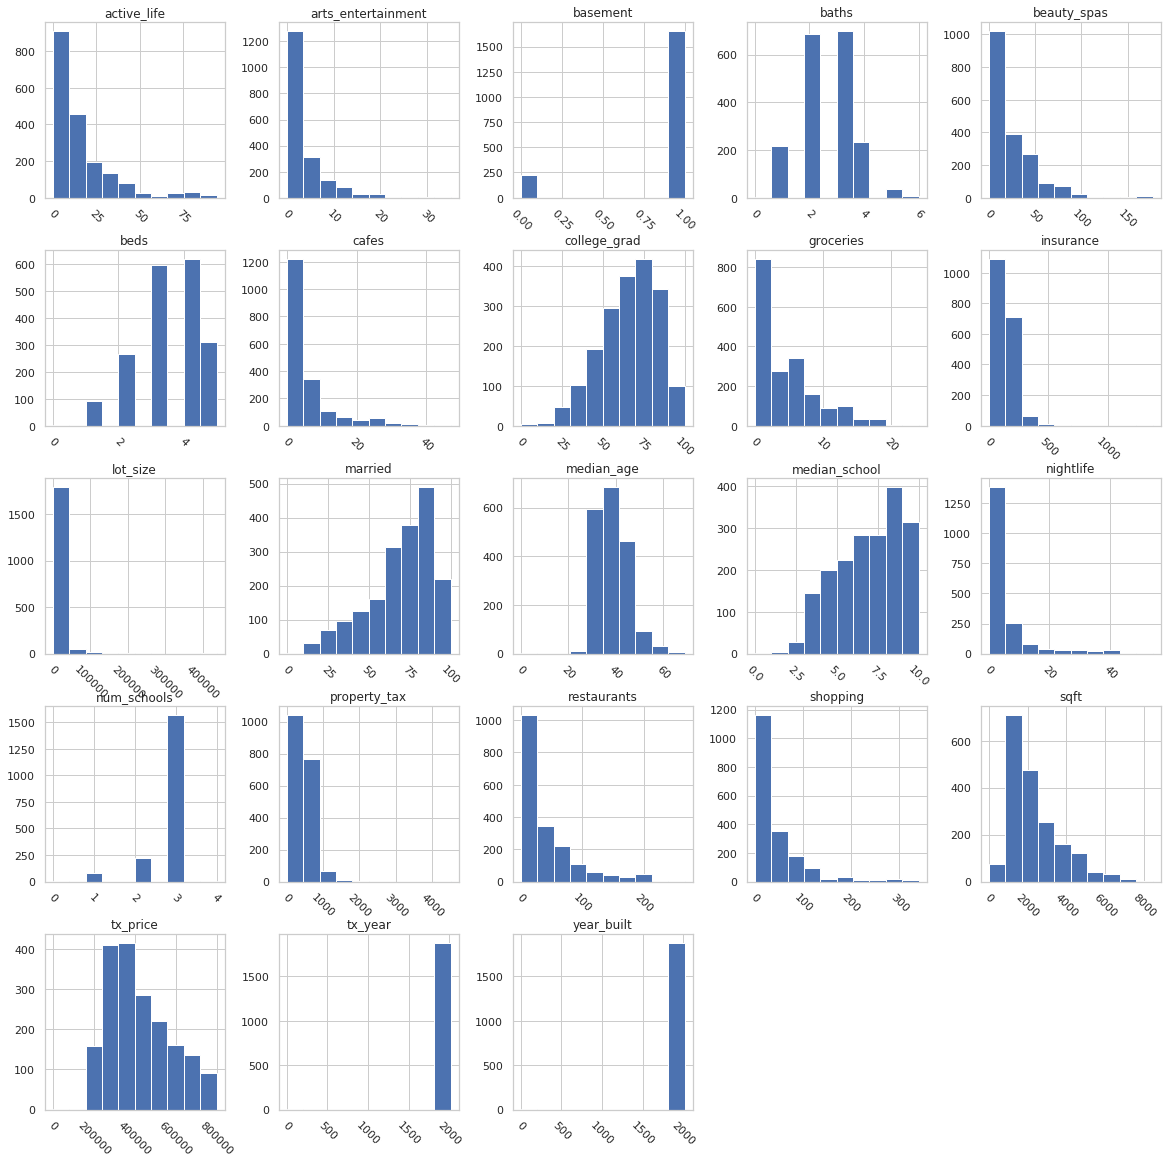

In [37]:
df.hist(xrot=-45, figsize=(20, 20))
plt.show()

In [0]:
#df[df['tx_year'] < 2000]['tx_year']

# Distributions of Categorical Features

Next, let's take a look at the distributions of our categorical features.
<br>

Display summary statistics for categorical features.

#### DataFrames `describe()` method parameters:
- `include` (string, or list of strings): which can take in an the following value `"object"` to show only information about categorical features.  

In [39]:
# Summarize categorical features
df.describe(include=["object"])

,property_type,exterior_walls,roof
count,1883,1660,1530
unique,3,17,17
top,Single-Family,Brick,Composition Shingle
freq,1080,686,1179


### Let's loop through our categorical DataFrame and show each of the feature's distributions

When we loop through (iterate over) a pandas DataFrame we will access the column (feature) names. 

This is useful because now we are not hard coding feature names for desired operations on multiple columns of data. 

<br>

**Tip:** The following line of code will return a DataFrame with all of the categorical features
```python 
df.select_dtypes(include=['object'])
```
<br>


Once we have access to the feature name let us do the following:
- show the distribution of the feature by creating a countplot using `sns.countplot()` 
- print the value counts of each feature using the Series' `value_counts()` method 
- print a blank line 

#### sns.countplot() parameters:
- (optional) `x` (string: series name): specify the values for the x axis
- (optional) `y` (string: series name): specify the values for the y axis
- `data` (DataFrame, array, or list of arrays): Dataset for plotting

#### value_counts() parameters:
- `dropna` (boolean): default True; If `True` don’t include counts of NaN, if `False` include counts of NaN values


In [40]:
type(df.select_dtypes(include='object'))

pandas.core.frame.DataFrame

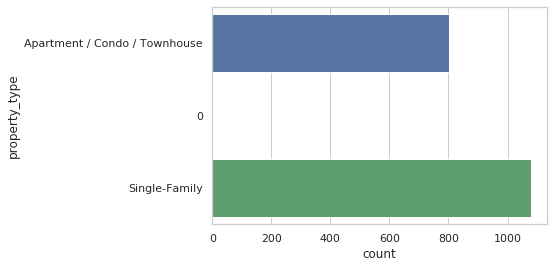

Single-Family                    1080
Apartment / Condo / Townhouse     802
0                                   1
Name: property_type, dtype: int64



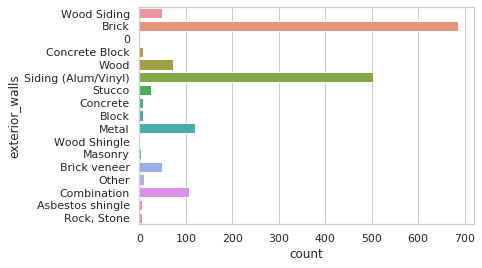

Brick                  686
Siding (Alum/Vinyl)    503
NaN                    223
Metal                  120
Combination            107
Wood                    72
Wood Siding             49
Brick veneer            48
Stucco                  26
Other                   10
Concrete                 8
Block                    7
Concrete Block           7
Asbestos shingle         6
Rock, Stone              5
Masonry                  3
Wood Shingle             2
0                        1
Name: exterior_walls, dtype: int64



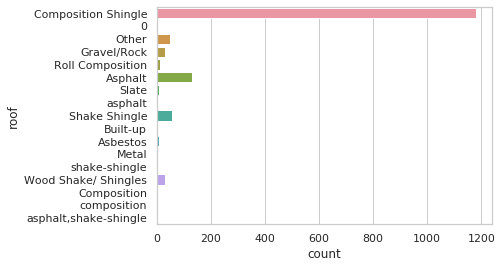

Composition Shingle      1179
NaN                       353
Asphalt                   132
Shake Shingle              55
Other                      49
Gravel/Rock                30
Wood Shake/ Shingles       30
Roll Composition           12
Asbestos                    9
Slate                       9
asphalt                     5
Composition                 5
Metal                       4
composition                 4
shake-shingle               3
Built-up                    2
0                           1
asphalt,shake-shingle       1
Name: roof, dtype: int64



In [41]:
# Countplot for each categorical feature
for feature_name in df.select_dtypes(include=['object']): 
    sns.countplot(y=feature_name, data=df)
    plt.show()
    print(df[feature_name].value_counts(dropna=False))
    print()

## Fix Categorical Structural Errors


One thing we should notice is that there are observations (rows) with all categorical columns having `0` as a value.

### Investigate these rows with '0' as column values 
- Use a boolean series to identify the index of the row with the value of `0` for the categorical features

**Tip:**
- Pandas `Series.str.contains()` function is used to test if pattern or regex is contained within a string of a Series or Index.

Example: 
```python
df[df['feature_name'].str.contains('partial value or exact value to look for')]
```

**Tip:**
- you can use a `|` (or) operator to handle if multiple conditions might occur

Example:
```python
df[( (df['feature_one'].str.contains('0')) | (df['feature_two'].str.contains('0')) | (df['feautre_three'].str.contains('0'))  )]
```

If any of the conditions are true we will see those rows

<br>



### Print the rows with `'0'` as a value for the categorical columns (features) 



In [42]:
df[( (df['property_type'].str.contains('0')) | (df['roof'].str.contains('0')) | (df['exterior_walls'].str.contains('0'))  )]

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see that the row indexed at number 2 has `0` and `'0'` as values for each of the columns. This is something we saw while displaying the head but sometimes these rows will not be present in the head or tail of the DataFrame. It is just something we have to look out for and remember for future datasets. In our case we identified this situation by using visualizations and plots to find this outlier observation. 

We can remove this row from the DataFrame by using the pandas `drop()` DataFrame method.

#### Pandas DataFrame drop() method parameters:
- `labels` (single label string or integer or a list of strings and integers): Index or column labels to drop.
- `axis` : {0 or ‘index/row’, 1 or ‘columns’}, default 0
Whether to drop labels from the index (0 or ‘index/row’) or columns (1 or ‘columns’). 
- `inplace` (bool): default False; If True, do operation inplace and return None.

<br>

### Delete this observation


In [0]:
df.drop(labels=2, axis=0, inplace=True)

### Because we removed a few rows from the DataFrame let's reset the index of the DataFrame

The Series' `reset_index()` method will generate a new DataFrame or Series with the index reset. This is useful when the index needs to be treated as a column, or when the index is meaningless and needs to be reset to the default before another operation.

#### Series' `reset_index()` parameters:
- drop (bool): default False, will reset the indexes and create a new column with the old indexes. If 'True` the method drops the current index of the DataFrame and replaces it with an index of increasing integers. 



### Reset the index of the DataFrame:
- reassign the `df` variable with the DataFrame's `reset_index()` method
- set the `reset_index()` `drop` parameter to `True`


In [0]:
df = df.reset_index(drop=True)

### Confirm that we deleted all the rows with `'0'` as a value for the categorical columns (features) 



In [45]:
df[( (df['property_type'].str.contains('0')) | (df['roof'].str.contains('0')) | (df['exterior_walls'].str.contains('0'))  )]

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year


<br>

### Handling NAN values
It seems that there are missing values in the categorical features, we will need to remove them if we want to have a well performing model.

We will do this by using the series `fillna()` method.
#### `fillna()` parameters:
- value (scalar, dict, Series, or DataFrame): The value to use to fill null values (e.g. "missing")
-inplace (boolean): default False, if `True`, fill in-place

#### Generic Example: 
```python 
 df['feature_name'] = df['feature_name'].fillna(value="missing")

 # inplace example
 df['feature_name'].fillna(value="missing", inplace=True)
```

#### Fill in missing 'exterior_walls' with a the value 'missing'

In [0]:
df['exterior_walls'] = df['exterior_walls'].fillna('missing')

#### Confirm that we have a true indicator variable for the `basement` series (column):

- Use the series' `unique()` method to show unique values of a column

In [47]:
# Display unique values of 'basement'
df['exterior_walls'].unique()

array(['Wood Siding', 'Brick', 'Concrete Block', 'Wood',
       'Siding (Alum/Vinyl)', 'Stucco', 'Concrete', 'Block', 'missing',
       'Metal', 'Wood Shingle', 'Masonry', 'Brick veneer', 'Other',
       'Combination', 'Asbestos shingle', 'Rock, Stone'], dtype=object)

### Fill in missing 'exterior_walls' with a the value 'missing'

In [0]:
df['roof'] = df['roof'].fillna('missing')

#### Confirm that we have a true indicator variable for the `basement` series (column):

- Use the series' `unique()` method to show unique values of a column

In [49]:
# Display unique values of 'basement'
df['roof'].unique()

array(['missing', 'Composition Shingle', 'Other', 'Gravel/Rock',
       'Roll Composition', 'Asphalt', 'Slate', 'asphalt', 'Shake Shingle',
       'Built-up', 'Asbestos', 'Metal', 'shake-shingle',
       'Wood Shake/ Shingles', 'Composition', 'composition',
       'asphalt,shake-shingle'], dtype=object)

<hr>

<br>

## Data Cleaning 

### Clean-up the `roof` column (series)

#### Recap:
We mentioned that features (columns) can suffer from  having to many unique values, refered to as noise. This can hurt machine learning algorithms because it will try to learn to seperate or cluster too many unique values. If we can remove the amount of unique values in a series (column) then the machine learning algorithm can perform better.

**Remember** having more features (columns/series) and unique values for each feature doesn't mean a better machine learning algorithm. Infact it will increase the noise and decrease the efficiency and can result in overfitting.

#### Using seaborn's countplot, plot the `roof` distribution

#### sns.countplot() parameters:
- (optional) `x` (string: series name): specify the values for the x axis
- (optional) `y` (string: series name): specify the values for the y axis
- `data` (DataFrame, array, or list of arrays): Dataset for plotting

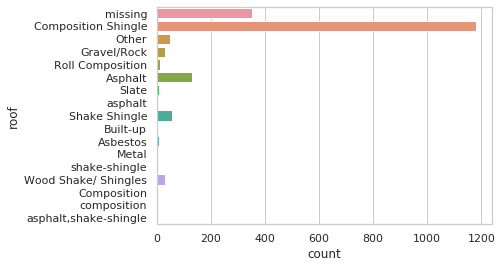

In [50]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

Notice that there are some typos and inconsistent capitalization in the `roof` feature.

#### Using the series' `replace()` method replace values of a column (series)

#### series' `replace()` method parameters:
- `to_replace` (str, regex, list, dict, Series, int, float, or None): How to find the values that will be replaced.
-value (scalar, dict, list, str, regex, default None): Value to replace any values matching to_replace with. 
- `inplace` (boolean): default False, Whether to replace values in place or to return a copy

**Example:**
```python 
df['feature'].replace(to_replace='desired_value_to_replace', value='desired_value', inplace=True)
```

**Note:** We can also provide a list of values as an argument to the `to_replace` parameter

**Example:**
```python 
df['feature'].replace(to_replace = ['a_desired_value_to_replace', 'another_desired_value_to_replace'], value = 'desired_value', inplace=True)
```

<br>



#### Replace `composition` with `Composition` 

In [0]:
# 'composition' should be 'Composition'
df['roof'].replace(to_replace='composition', value='Composition', inplace=True)

#### Replace `asphalt` with `Asphalt` 

In [0]:
# 'asphalt' should be 'Asphalt'
df['roof'].replace('asphalt', 'Asphalt', inplace=True)

#### Replace `'shake-shingle'`, `'Ashpalt, shake-shingle'`, `'asphalt,shake-shingle'` with the value `'Shake Shingle'`



In [0]:
# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df['roof'].replace(to_replace=['shake-shingle', 'ashpalt, shake-shingle', 'asphalt,shake-shingle'], value='Shake Shingle', inplace=True)

#### Group `'Composition'` and `'Wood Shake/ Shingles'` into the `'Composition Shingle'` class.


In [0]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df['roof'].replace(to_replace=['Composition', 'Wood Shake/ Shingles'], value='Composition Shingle', inplace=True)

#### Group `Gravel/Rock'`, `'Roll Composition'`, `'Slate'`, `'Built-up'`, `'Asbestos'`, and `'Metal'` into the `'Other'` class.

In [0]:
# List of classes to group
group_to_replace = ['Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal', 'Other']

# Group other classes into 'Other'
df['roof'].replace(to_replace=group_to_replace, value='Other', inplace=True)

#### Using seaborn's countplot, plot the `roof` distribution to see the changes 

#### sns.countplot() parameters:
- (optional) `x` (string: series name): specify the values for the x axis
- (optional) `y` (string: series name): specify the values for the y axis
- `data` (DataFrame, array, or list of arrays): Dataset for plotting

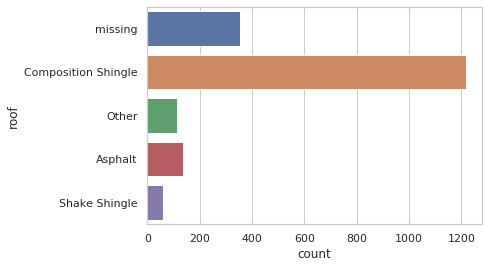

In [56]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

### Clean-up `exterior_walls` column (series)



#### Plot the class distributions for `'exterior_walls'` using a countplot

#### sns.countplot() parameters:
- (optional) `x` (string: series name): specify the values for the x axis
- (optional) `y` (string: series name): specify the values for the y axis
- `data` (DataFrame, array, or list of arrays): Dataset for plotting

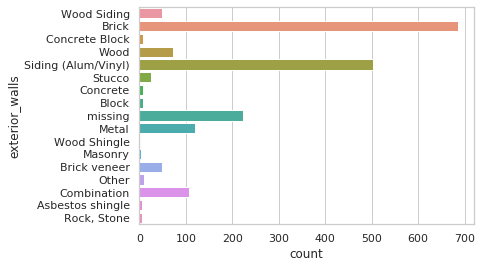

In [57]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

#### Replace any instances of `'Rock, Stone'` with `'Masonry'`
- Note: `Rock, Stone` is one value not two

In [0]:
# 'Rock, Stone' should be 'Masonry'
df['exterior_walls'].replace(to_replace='Rock, Stone', value='Masonry', inplace=True )

#### Replace any instances of `'Concrete'` and `'Block'` with `'Concrete Block'` 

In [0]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df['exterior_walls'].replace(to_replace=['Concrete', 'Block'], value='Concrete Block', inplace=True )

#### Group <code style="color:crimson">'Wood Siding'</code> and <code style="color:crimson">'Wood Shingle'</code> into the existing <code style="color:crimson">'Wood'</code> value


In [0]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df['exterior_walls'].replace(to_replace=['Wood Siding', 'Wood Shingle'], value='Wood', inplace=True)

#### Group `'Stucco'`, `'Asbestos shingle'`, `'Concrete Block'`, and `'Masonry'` into the existing `'Other'` value

In [0]:
# List of classes to group
group_to_replace = ['Stucco', 'Asbestos shingle', 'Concrete Block', 'Masonry']

# Group other classes into 'Other'
df['exterior_walls'].replace(to_replace=group_to_replace, value='Other', inplace=True)

#### Using seaborn's countplot, plot the `exterior_walls` distribution to see the changes 

#### sns.countplot() parameters:
- (optional) `x` (string: series name): specify the values for the x axis
- (optional) `y` (string: series name): specify the values for the y axis
- `data` (DataFrame, array, or list of arrays): Dataset for plotting

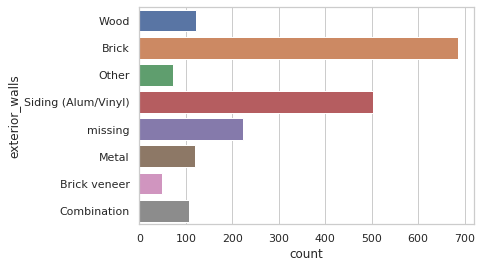

In [62]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

<hr>

<br>

# Correlations

Let's take a look at the relationships between **numeric features** and **other numeric features**.

<br>

### Create a `correlations` dataframe from `df`

- Use pandas' DataFrame `.corr()` method to show you all of the correlations between all the columns of the DataFrame.
- Save this correlations DataFrame into a variable called `correlations`

**Note:** The default parameters utilizes the pearson correlation coefficient.



In [0]:
#Calculate correlations between numeric features
correlations = df.corr()

<br>

### Visualize the correlation grid using a seaborn heatmap to make it easier to digest

#### Recap:
A **heat map** is a graphical representation of data where the individual values contained in a matrix are represented as colors.

#### seaborn.heatmap() parameters:
- `data` (DataFrame): rectangular dataset, 2D dataset
- `annot` (boolean): argument controls whether to annotate each cell with its value. By default, it's `False`.

**Tips:**
- To make the chart cleaner, multiply the <code style="color:steelblue">correlations</code> DataFrame by 100 before passing it to the heatmap function.
- Pass in the argument <code style="color:steelblue">fmt=<span style="color:crimson">'.0f'</span></code> to format the annotations to a whole number.
- we will use a mask that will help us cut out the duplicates correlation values.

#### Creation of heatmap:
```python 
# Calculate correlations between numeric features
correlations = df.corr()

# Make the figsize 15 x 15
plt.figure(figsize=(15, 15))

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap of annotated correlations
correlations = correlations * 100

# Plot heatmap of correlations
sns.heatmap(data=correlations, annot=True, fmt='.0f', mask=mask)

# Uncomment the code below to fix the heatmap being cut off
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values

# Show the heatmap
plt.show() 
```
#### Try it yourself:

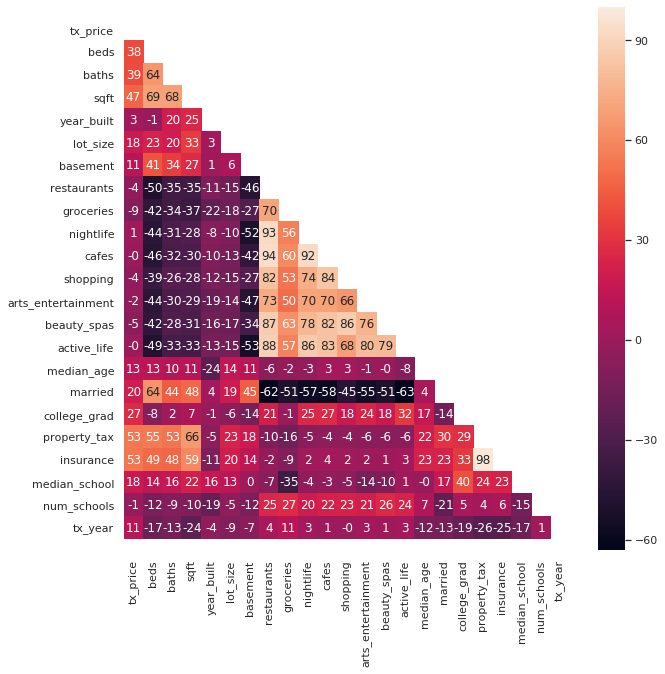

In [64]:
# Calculate correlations between numeric features
correlations = df.corr()

# Make the figsize 15 x 15
plt.figure(figsize=(10, 10))

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap of annotated correlations
correlations = correlations * 100

# Plot heatmap of correlations
sns.heatmap(data=correlations, annot=True, fmt='.0f', mask=mask)

# Uncomment the code below to fix the heatmap being cut off
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Show the heatmap
plt.show() 

#### **Is there a correlation between property tax and transaction price (tx_price)?**

There is a high correlation between property taxes and transaction prices.  This is made clear by inspecting the heatmap below. The data and heatmap make sense as a homes property taxes are based on the price of the home.

<br>

#### **Does lifestyle features effect tx_price?**
Lifestyle features include the following:
- restaurants
- groceries
- nightlife
- cafes
- shopping
- arts_entertainment
- beauty_spas
- active_life

Not really, the pearson coefficent correlation values are close to 0 meaning there is no correlation

<hr>

<br>

# Feature Engineering

We noticed that there are close to no correlations reguarding lifestyle features.

**Remember:** 
It is important to note that having more features (columns/series) and unique values for each feature doesn't mean a better machine learning algorithm. Infact it will increase the noise and decrease the efficiency and can result in overfitting.

**Note:** Everything we have done in this notebook will effect the machine learning algorithm. That being said, it is important to note that this process is iterative. Maybe grouping unique values (sparse amount of classes) or combining columns actually brings down the accuracy and performance of the model. The only way to find out is by analyzing the results of the model and then come back to this notebook to tinker with the dataset in different ways and see if we get more performant models. Of course knowing domain knowledge helps but typically domain knowledge comes into play after the first iteration of creating a model. 

Ultimately we are only able to see plots in smaller dimensions i.e. no more than three dimensions. That being said maybe us combining features or dropping only based on a pearson correlation coefficent (comparing two features numerical with on another) may be hurtful because we can not see higher dimensional clustering.

[Check out this video to get an understanding of what machine learning is doing with dimensional space](https://www.youtube.com/watch?v=wvsE8jm1GzE)

<br>

## That being said let's group the lifestyle features together to for applicational practices

### Create a list of lifestyle column names

In [0]:
lifestyles = ['restaurants', 'groceries', 'nightlife', 'cafes', 'shopping', 'arts_entertainment', 'beauty_spas', 'active_life']

In order for us to group these features together we need to normailize the values. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

We will do this with the following logic.

First create a new variable to hold a new DataFrame containing all of the lifestyle features, call this variable `lifestyle_df`.

Then for each column of the lifestyle features DataFrame compute the mean and standard deviation. Once we have these values we will perform element wise operations.

More specifically we will subtract each element in each column the dataframe from it's mean of that specific column and then we will divide this value with the standard deviation of that column. 

**Logic:**
```python 
normalized_df = ( df - df.mean() ) / df.std()
```

### Create A Lifestyle DataFrame


In [0]:
lifestyle_df = df[lifestyles]

### Print the head of the new DataFrame to make sure we did the operation correctly

In [67]:
lifestyle_df.head()

,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life
0,107.0,9.0,30.0,19.0,89.0,6.0,47.0,58.0
1,105.0,15.0,6.0,13.0,87.0,2.0,26.0,14.0
2,183.0,13.0,31.0,30.0,101.0,10.0,74.0,62.0
3,198.0,9.0,38.0,25.0,127.0,11.0,72.0,83.0
4,149.0,7.0,22.0,20.0,83.0,10.0,50.0,73.0


Normalize the `lifestyle_df` and save the result in a variable called `normalized_lifestyle_df`

In [0]:
normalized_lifestyle_df = ( lifestyle_df - lifestyle_df.mean() ) / lifestyle_df.std() 

### Print the head of the new normalized DataFrame to make sure we did the operation correctly

We want the values to be in the range of -10 and +10

In [69]:
normalized_lifestyle_df.head()

,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life
0,1.425059,1.001934,2.944580,1.813592,0.899971,0.557419,0.915159,2.388362
1,1.382394,2.338319,0.109649,1.017948,0.862625,-0.295651,0.100581,-0.103078
2,3.046340,1.892857,3.062702,3.272273,1.124046,1.410488,1.962474,2.614856
3,3.366329,1.001934,3.889557,2.609236,1.609542,1.623755,1.884895,3.803953
4,2.321030,0.556472,1.999603,1.946200,0.787933,1.410488,1.031527,3.237716


### Let us combine the lifestyle columns (series) together to reduce noise in the dataset

We will do this by creating a new column in the original `df` DataFrame called `lifestyle_avg`. We will populate this new feature by taking the mean of the `normalized_lifestyle_df` column wise for each row.

```python 
df['lifestyle_avg'] = normalized_lifestyle_df[lifestyles].mean(axis=1)
```

Note: we specify `axis=1` as the argument for the mean method to state taking the mean row wise.

### Create a `lifestyle_avg` feature in the original `df`

In [0]:
df['lifestyle_avg'] = normalized_lifestyle_df[lifestyles].mean(axis=1)

### Drop the lifestyle features

#### Pandas DataFrame drop() method parameters:
- `labels` (single label string or integer or a list of strings and integers): Index or column labels to drop.
- `axis` : {0 or ‘index/row’, 1 or ‘columns’}, default 0
Whether to drop labels from the index (0 or ‘index/row’) or columns (1 or ‘columns’). 
- `inplace` (bool): default False; If True, do operation inplace and return None.

**Note**:
Make sure to use the value `1` as the argument for the axis parameter

In [0]:
df.drop(lifestyles, axis=1, inplace=True)

### Display the head to make sure we have done the operation correctly.

In [72]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,lifestyle_avg
0,295850.0,1.0,1.0,584.0,2013.0,0.0,Apartment / Condo / Townhouse,Wood,missing,0.0,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013.0,1.493259
1,216500.0,1.0,1.0,612.0,1965.0,0.0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006.0,0.676598
2,279900.0,1.0,1.0,615.0,1963.0,0.0,Apartment / Condo / Townhouse,Wood,missing,0.0,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012.0,2.298254
3,379900.0,1.0,1.0,618.0,2000.0,33541.0,Apartment / Condo / Townhouse,Wood,missing,0.0,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005.0,2.473650
4,340000.0,1.0,1.0,634.0,1992.0,0.0,Apartment / Condo / Townhouse,Brick,missing,0.0,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002.0,1.661371


<hr> 

### More Feature Engineering 

You can often engineer informative features by tapping into your (or others) expertise about the domain

### Create an indicator variable to flag properties with 3 beds and 2 baths and name it `'three_and_two'`

In [0]:
# Create indicator variable for properties with 2 beds and 2 baths
df["two_and_two"] = ((df.beds == 2) & (df.baths == 2)).astype(int)

### Create your own feature on the `df` DataFrame

<hr> 

<br id="dummy">

## Encode dummy variables

Python machine learning algorithms cannot handle categorical features directly. We will have to convert categorical variable into dummy/indicator variables, or variables that hold numerical values that represents categorical data in order for the computer to learn from these features. 

One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

Technically, dummy variables are dichotomous, quantitative variables. Their range of values is small; they typically take on only two quantitative values, though sometimes can have more but the range should not have too many unique values. 

<br>

### Let's create a new dataframe with dummy variables for our categorical features

#### Pandas `get_dummies()` method parameters:
- `data` (array-like, Series, or DataFrame): Data of which to get dummy indicators.
- `columns` (string, or list of strings): default None; Column names in the DataFrame to be encoded.

#### pd.get_dummies() returns: 
- The one-hot encoded version of the `df` you passed in

**Note:** The new column names will be the old column name prepended before the categorical value name, seperated by underscores 

In order for the DataFrame to be updated with the one hot encoded columns we will have to reassign the original DataFrame with the return of the DataFrame's `get_dummies()` method.

For Example: 
```python
df = pd.get_dummies(data=df, columns=cols_to_encode)
```

#### **Make a list with the names of the columns that you want to encode. We will choose all of the categorical columns.**

Let us encode the following categorical columns (series):
- exterior_walls
- roof
- property_type

### Create a list variable `cols_to_encode` with the column names

In [0]:
cols_to_encode = ['exterior_walls', 'roof', 'property_type']

**Here's a more generic approach, in case your dataframe has 40 categorical columns and you would rather have python populate the list for you.**

```python 
generic_list = df.dtypes[df.dtypes == "object"].index
```

### Using `pd.get_dummies()` encode the specified columns (series) from the original DataFrame 

#### Pandas get_dummies() method parameters:
- `data` (array-like, Series, or DataFrame): Data of which to get dummy indicators.
- `columns` (string, or list of strings): default None; Column names in the DataFrame to be encoded.

In [0]:
# Create new dataframe with dummy features
df = pd.get_dummies(data= df, columns=cols_to_encode)

#### Display the first 5 rows of your dataframe to see these new features.

In [76]:
# First 5 rows of dataframe
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,lifestyle_avg,two_and_two,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,exterior_walls_missing,roof_Asphalt,roof_Composition Shingle,roof_Other,roof_Shake Shingle,roof_missing,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850.0,1.0,1.0,584.0,2013.0,0.0,0.0,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013.0,1.493259,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,216500.0,1.0,1.0,612.0,1965.0,0.0,1.0,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006.0,0.676598,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900.0,1.0,1.0,615.0,1963.0,0.0,0.0,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012.0,2.298254,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
3,379900.0,1.0,1.0,618.0,2000.0,33541.0,0.0,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005.0,2.473650,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,340000.0,1.0,1.0,634.0,1992.0,0.0,0.0,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002.0,1.661371,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<hr>

# Save the analytical base table and target variable table!

Let's save the new dataframe using Pandas' <code style="color:steelblue">.to_csv()</code> function
- Pass in the value None as an argument to the `index` parameter, so that Pandas drops the indices and only stores the actual data in the CSV.

#### DataFrame's `to_csv()` Method Parameters:
- `path_or_buf` (string): File path of where to store DataFrame, if None is provided the result is returned as a string
- `index` (boolean or None): default True, Write row names (index).

### Save The DataFrame Before Splitting the DataFrame into the Analytical Base DataFrame and the Target Variable DataFrame
- use the following argument value for the `path_or_buf` parameter:
```python
path_or_buf='./cleaned_and_feature_engineered_real_estate.csv'
```


In [0]:
# Save analytical base table
df.to_csv(path_or_buf='./cleaned_and_feature_engineered_real_estate.csv', index=None)

<br id="remove">

## Prepare saving the Analytical Base and the Target Variable DataFrames
### Remove unused or redundant features

**Finally, let's save the target variable and drop unused -or- redundant features from our dataset.**

**Save <code style="color:steelblue">'tx_year'</code> from your dataset, into the variable `target`.**

In [0]:
target = df['tx_price']

<br>

**Drop <code style="color:steelblue">'tx_price'</code> from your dataset.**

We will do this with using the DataFrame's `.drop()` method.

##### DataFrame's `drop()` parameters:
- `labels` (string or list of strings): index or column labels to drop
- `axis`  ({0 or ‘index’, 1 or ‘columns’}): default 0; whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
- `inplace` (bool): default False; If True, do operation inplace and return None.



In [0]:
# Drop 'tx_price' from the dataset
df.drop(labels='tx_price', axis=1, inplace=True)

<br>

### Display the head to make sure we have the desired output

In [80]:
df.tail()

,beds,baths,sqft,year_built,lot_size,basement,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,lifestyle_avg,two_and_two,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,exterior_walls_missing,roof_Asphalt,roof_Composition Shingle,roof_Other,roof_Shake Shingle,roof_missing,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
1877,5.0,6.0,6381.0,2004.0,224334.0,1.0,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002.0,-0.792553,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1878,5.0,6.0,6501.0,1956.0,23086.0,1.0,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015.0,0.247411,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1879,5.0,6.0,7064.0,1995.0,217800.0,1.0,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999.0,-0.643123,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1880,5.0,6.0,7500.0,2006.0,8886.0,1.0,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009.0,-0.524305,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1881,5.0,6.0,7515.0,1958.0,10497.0,1.0,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015.0,-0.696683,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Save The Analytical Base DataFrame
- use the following argument value for the `path_or_buf` DataFrame's `to_csv()` method parameter:
```python
path_or_buf='./cleaned_and_feature_engineered_real_estate_abd.csv'
```


In [0]:
# Save analytical base table
df.to_csv(path_or_buf='./cleaned_and_feature_engineered_real_estate_abd.csv', index=None)

### Save The Target Variable DataFrame
- use the following argument value for the `path_or_buf` DataFrame's `to_csv()` method parameter::
```python
path_or_buf='./cleaned_and_feature_engineered_real_estate.csv'
```

In [0]:
# Save Target
target.to_csv(path_or_buf='./cleaned_and_feature_engineered_real_estate_target.csv', index=None)

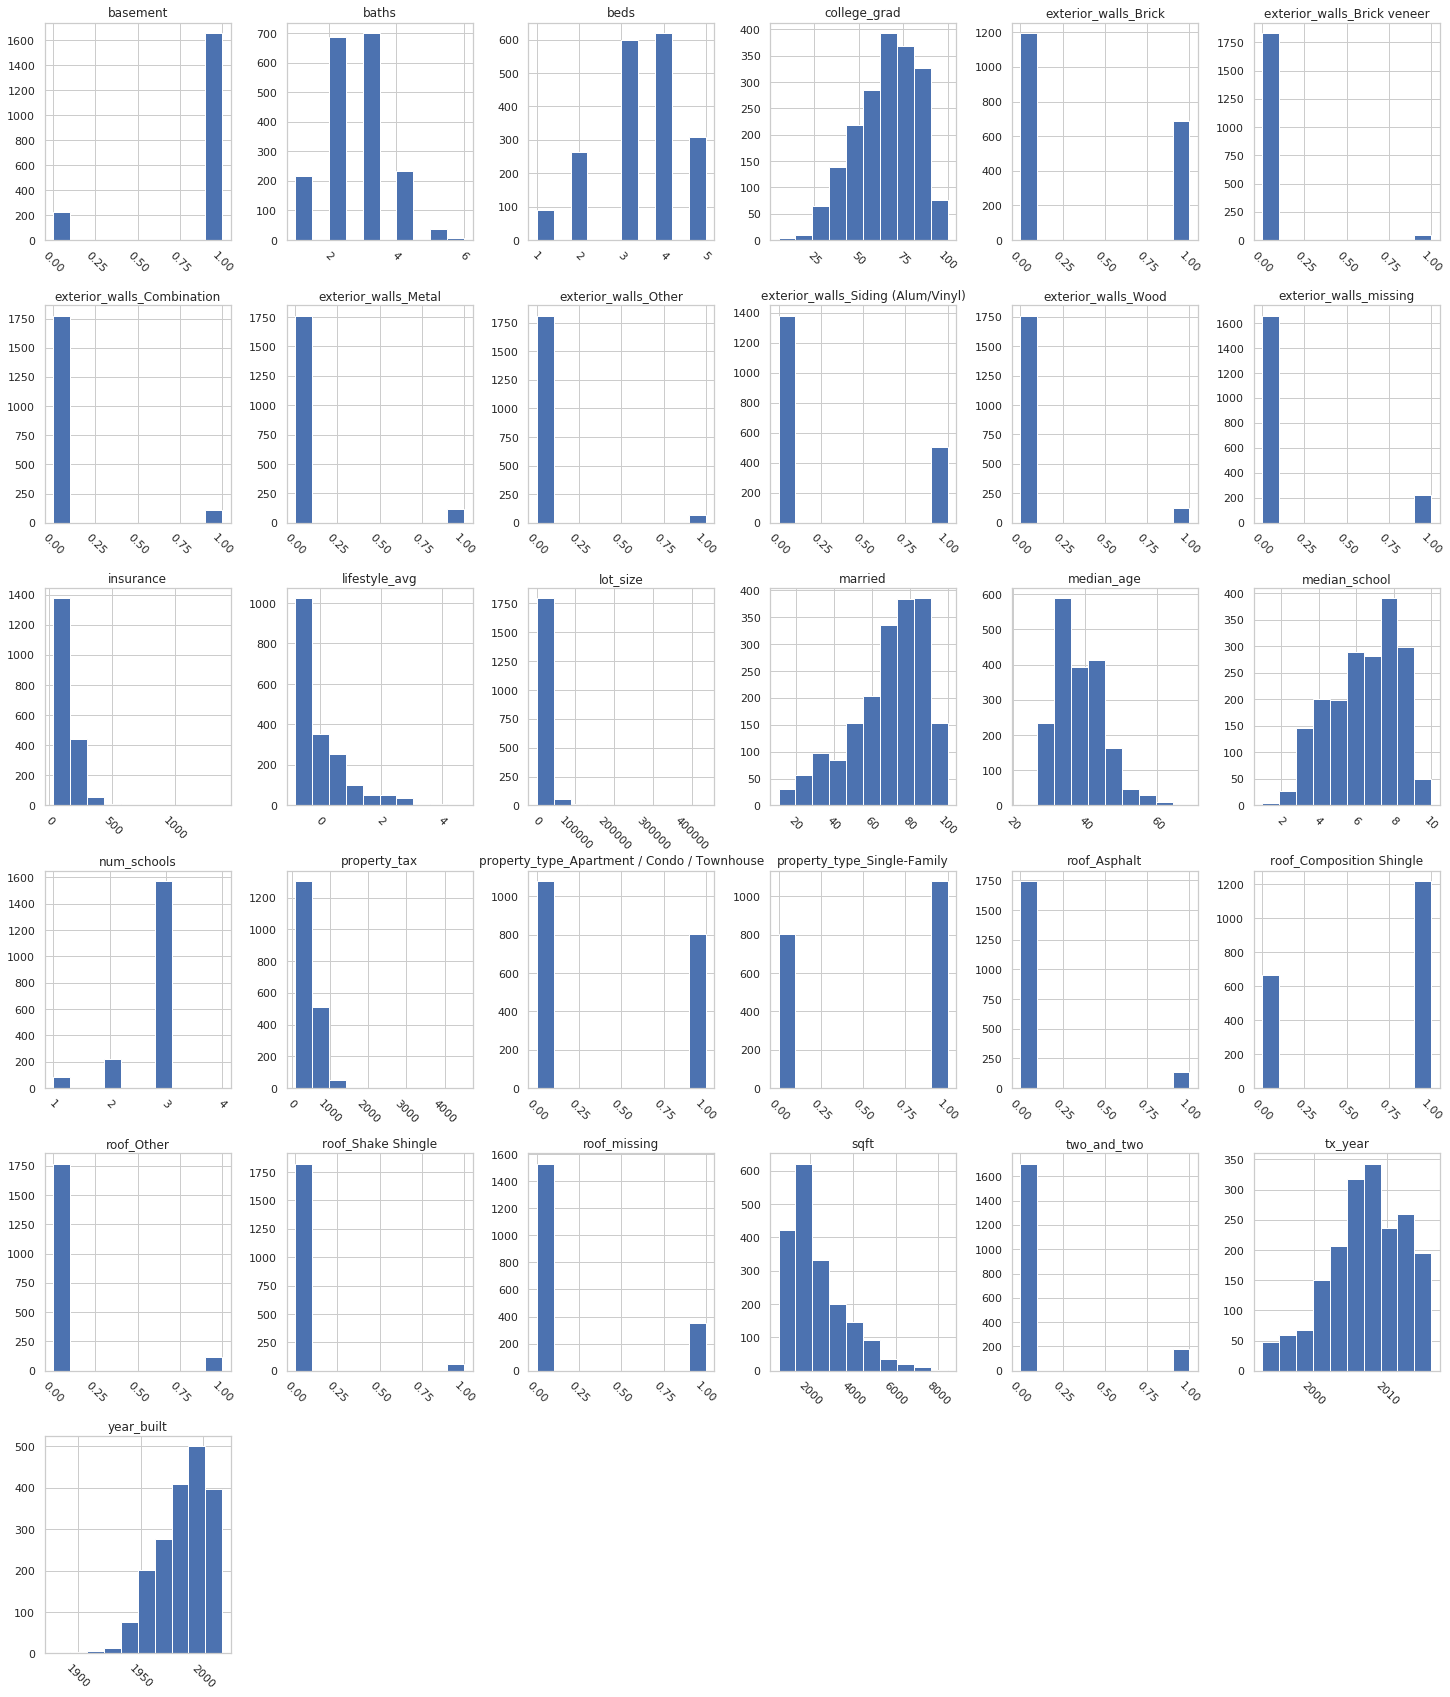

In [83]:
df.hist(xrot=-45, figsize=(25, 30))
plt.show()